In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
df1 = pd.read_csv('daily-total-female-births-CA.csv',index_col=[0],parse_dates=[0])
df1.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [125]:
df1.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


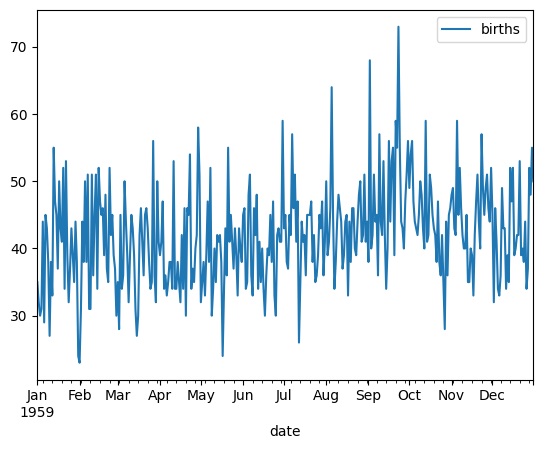

In [126]:
df1.plot()
plt.show()

- So it shows that there is not much change over the months but let's see by **Smoothing the Series** Using moving average to remove noise(fluctuation).

In [127]:
df_birth = df1.rolling(window=20).mean() #window 20 means by 20 days difference

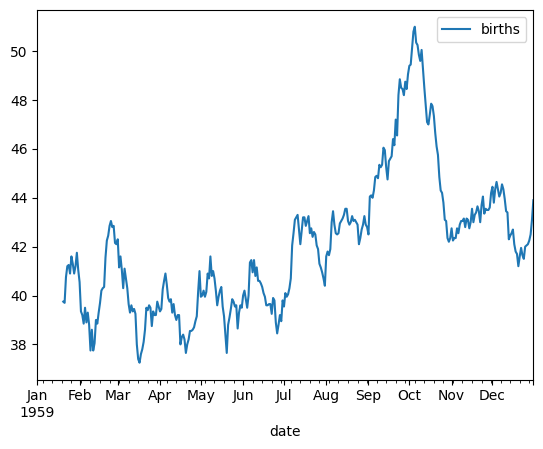

In [128]:
df_birth.plot()
plt.show()

- So this shows us more clearly than last one date there is increase in birth at the end of year

#### What type of base models are there?
- There are different types of base models like moving average model, exponential model, ARIMA, S ARIMA etc.

### Lag features:
To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

In [129]:
df2

,births,Lag_1
date,,
2015-01-01,8068,NaN
2015-01-02,10850,8068.0
2015-01-03,8328,10850.0
2015-01-04,7065,8328.0
2015-01-05,11892,7065.0
...,...,...
2015-12-27,7518,7294.0
2015-12-28,13100,7518.0
2015-12-29,13458,13100.0


In [130]:
df2 = df1.copy()
df2['Lag_1'] = df2['births'].shift(1)
df2 = df2.reindex(columns=['births','Lag_1'])
df2.head()

,births,Lag_1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


### ERROR

In [131]:
from sklearn.metrics import mean_squared_error

We have to take values from seconds row bcs there is NAN value at first index of second column so it will give us error

In [132]:
birth = df2.iloc[1:,:]
birth.head()

,births,Lag_1
date,,
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0
1959-01-06,29,44.0


In [133]:
birth_error = mean_squared_error(birth['births'],birth['Lag_1'])

In [134]:
print(birth_error) ## It is large bcs mean_sqaured_error square the result

84.22252747252747


In [135]:
## Let's take sqrt
np.sqrt(birth_error)

9.177283229394606

### So this is our baseline model. So whatever other model we build like arima etc our error should go down than this.

## ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
AutoRegressive Integrated Moving Average (ARIMA) models are among the most widely used time series forecasting techniques: In an Autoregressive model, the forecasts correspond to a linear combination of past values of the variable.

In [136]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [137]:
df1

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


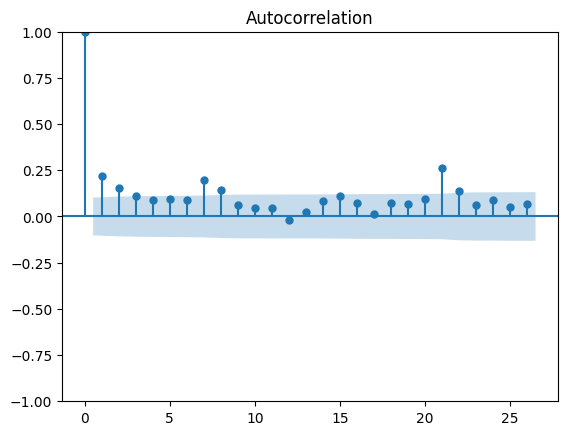

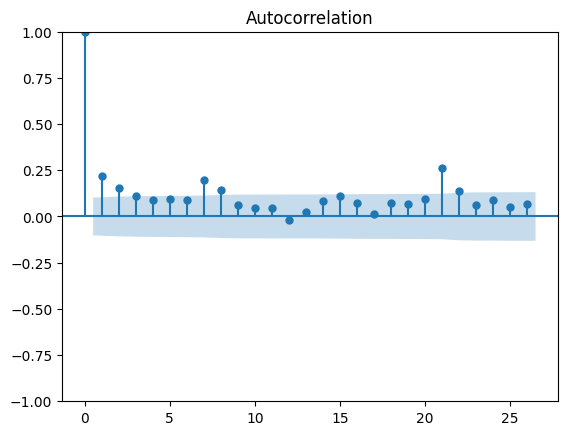

In [138]:
## plot_acf is to identify parameter q
## ARIMA(p,d,q)
plot_acf(df1)

C:\ProgramData\Miniconda3\envs\ds\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


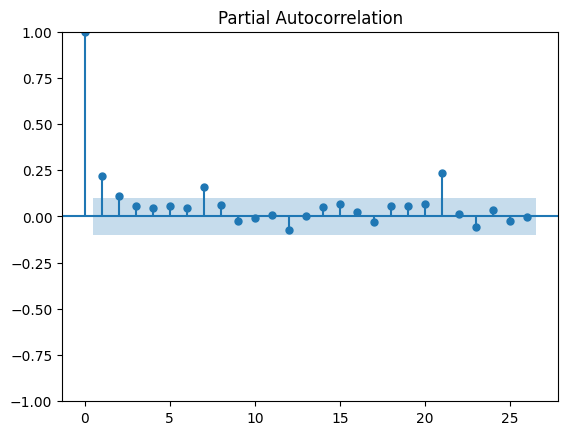

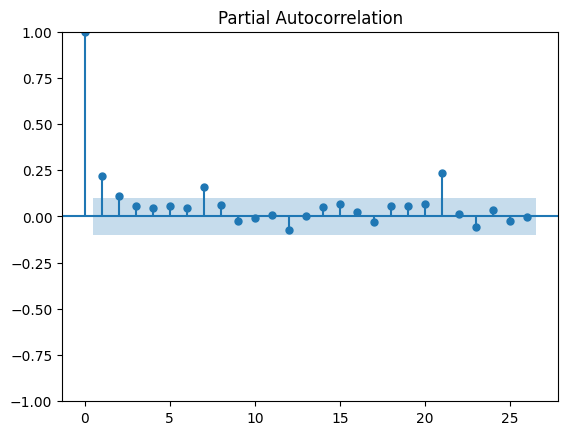

In [139]:
## plot_acf is to identify parameter p
plot_pacf(df1)

In [140]:
## p = 2,3  d = 0  q = 3,4
df1.shape

(365, 1)

In [141]:
## Let's split train and test
birth_train = df1[0:320]
birth_test = df1[320:365]

In [159]:
birth_train.shape

(320, 1)

In [151]:
import statsmodels.api as sm

In [220]:
model =  sm.tsa.arima.ARIMA(birth_train,order = (2,1,3))

C:\ProgramData\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [221]:
model_fit = model.fit()

In [222]:
model_fit.aic ## USING different values in order the less the value the good the modle is

2167.847239916681

### Let's forcast 

In [223]:
birth_forcast = model_fit.forecast(steps = 45)

In [224]:
birth_forcast  ## Predicted/Forcasting valaues

1959-11-17    42.860639
1959-11-18    43.279106
1959-11-19    43.447916
1959-11-20    43.526927
1959-11-21    43.555955
1959-11-22    43.571614
1959-11-23    43.576066
1959-11-24    43.579509
1959-11-25    43.579920
1959-11-26    43.580825
1959-11-27    43.580710
1959-11-28    43.581006
1959-11-29    43.580895
1959-11-30    43.581011
1959-12-01    43.580948
1959-12-02    43.580998
1959-12-03    43.580967
1959-12-04    43.580990
1959-12-05    43.580974
1959-12-06    43.580985
1959-12-07    43.580978
1959-12-08    43.580983
1959-12-09    43.580979
1959-12-10    43.580982
1959-12-11    43.580980
1959-12-12    43.580981
1959-12-13    43.580981
1959-12-14    43.580981
1959-12-15    43.580981
1959-12-16    43.580981
1959-12-17    43.580981
1959-12-18    43.580981
1959-12-19    43.580981
1959-12-20    43.580981
1959-12-21    43.580981
1959-12-22    43.580981
1959-12-23    43.580981
1959-12-24    43.580981
1959-12-25    43.580981
1959-12-26    43.580981
1959-12-27    43.580981
1959-12-28    43

In [225]:
birth_test  ## Actual values

,births
date,
1959-11-17,33
1959-11-18,42
1959-11-19,47
1959-11-20,51
1959-11-21,44
1959-11-22,40
1959-11-23,57
1959-11-24,49
1959-11-25,45


In [226]:
np.sqrt(birth_test['births'],birth_forcast).mean()  # So we reduce the ERROR 

6.587461812660141